In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style="darkgrid")

In [3]:
# 真实的
y_true=np.array([1,0,0,1,0])
# 算法预测的概率
y_=np.array([0.5,0.6,0.4,0.7,0.3])

In [4]:
# 假设阈值是0.3 
y_predict=y_>=0.3
(y_true==y_predict).mean()

0.4

In [5]:
for thredhold in y_:
    y_predict=y_>=thredhold
    accu=(y_true==y_predict).mean()
    print('when thredhold is {} accu is {}'.format(thredhold,accu))

when thredhold is 0.5 accu is 0.8
when thredhold is 0.6 accu is 0.6
when thredhold is 0.4 accu is 0.6
when thredhold is 0.7 accu is 0.8
when thredhold is 0.3 accu is 0.4


In [6]:
# y是真实的一个类别
y = np.array([1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0])
# 算法预测的概率
prob = np.array([0.42,0.73,0.55,0.37,0.57,0.70,0.25,0.23,0.46,0.62,
                 0.76,0.46,0.55,0.56,0.56,0.38,0.37,0.73,0.77,0.21,0.39])

In [7]:
y.size

21

In [8]:
prob.size

21

### ROC 曲线横坐标是fpr 假正率
### ROC 曲线纵坐标是tpr 正正率
#### 1.将数据先变成交叉表

![](ROC-AUC.png)

- `TruePositiveRate=TP/(TP+FN)`，代表将真实正将本划分为正样本的概率 
- `FalsePositiveRate=FP/(FP+TN)`，代表将真实负样本划分为正样本的概率 

In [9]:
from sklearn.metrics import roc_curve # 直接计算出来 tpr和fpr
from sklearn.metrics import confusion_matrix # 创建交叉表

In [10]:
threshold=np.linspace(0,1,10)
threshold

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [11]:
y_=prob>=0
y_=y_.astype(np.int8)

In [22]:
m=confusion_matrix(y_,y)
m

array([[ 0,  0],
       [ 9, 12]], dtype=int64)

In [25]:
m[:,0]

9

In [13]:
tpr=12/(12+0)
fpr=9/(9+0)
print("tpr is {} , fpr is {}".format(tpr,fpr))

tpr is 1.0 , fpr is 1.0


### 使用`pandas`创建交叉表

In [14]:
import pandas as pd

In [15]:
pd.crosstab(index=y,columns=y_,rownames=["真实类别"],colnames=["预测类别"])

预测类别,1
真实类别,
0,9
1,12


In [16]:
"""
fpr : ndarray of shape (>2,)
    Increasing false positive rates such that element i is the false
    positive rate of predictions with score >= `thresholds[i]`.

tpr : ndarray of shape (>2,)
    Increasing true positive rates such that element `i` is the true
    positive rate of predictions with score >= `thresholds[i]`.

thresholds : ndarray of shape = (n_thresholds,)
    Decreasing thresholds on the decision function used to compute
    fpr and tpr. `thresholds[0]` represents no instances being predicted
    and is arbitrarily set to `max(y_score) + 1`.
"""

fpr,tpr,thresholds=roc_curve(y,prob)

In [17]:
from sklearn.metrics import auc

In [18]:
auc_=auc(fpr,tpr)

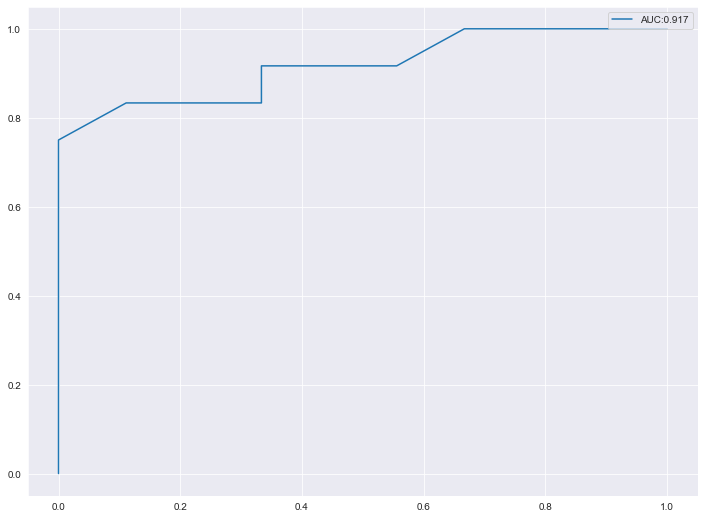

In [19]:
plt.figure(figsize=(12,9))
plt.plot(fpr,tpr)
plt.legend(["AUC:{}".format(auc_.round(3))],loc="best")